Goal - Most demanded skills for the top 3 most popular data jobs.

In [1]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
# Filtering the dataset to only include jobs from the United States and exploding the job_skills column.
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')

In [14]:
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name='Skill_count').sort_values(by='Skill_count', ascending=False)
df_skill_count

,job_skills,job_title_short,Skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [25]:
# getting the top 3 most popular job titles.
job_titles = sorted(df_skill_count['job_title_short'].value_counts().head(3).index.tolist())
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

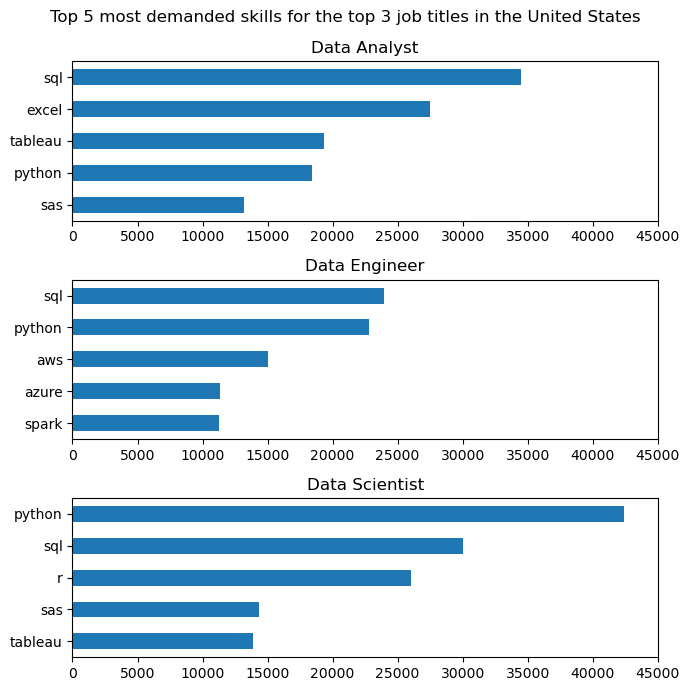

In [46]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(7, 7)

for i, job_title in enumerate(job_titles):
    df_job_title = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_job_title.plot(kind='barh', x='job_skills', y='Skill_count', ax=ax[i], legend=False)
    ax[i].invert_yaxis()
    ax[i].set_title(f'{job_title}')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 45000)

fig.suptitle('Top 5 most demanded skills for the top 3 job titles in the United States')
fig.tight_layout()


In [50]:
df_job_total = df_US['job_title_short'].value_counts().reset_index(name="Total_count")
df_job_total

,job_title_short,Total_count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [58]:
df_plot_percentage = pd.merge(df_skill_count, df_job_total, how='left', on='job_title_short')
df_plot_percentage["skill_percentage"] = 100 * df_plot_percentage['Skill_count']/df_plot_percentage['Total_count']

In [59]:
df_plot_percentage

,job_skills,job_title_short,Skill_count,Total_count,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


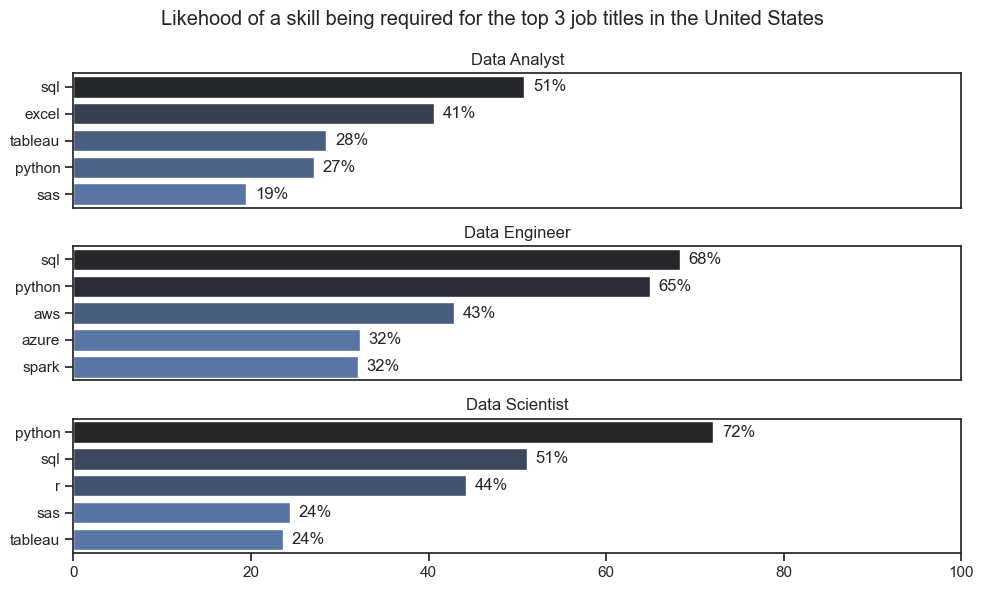

In [ ]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10, 6)

for i, job_title in enumerate(job_titles):
    df_job_title = df_plot_percentage[df_plot_percentage['job_title_short'] == job_title].head(5)
    # df_job_title.plot(kind='barh', x='job_skills', y='skill_percentage', ax=ax[i], legend=False)
    sns.set_theme(style='ticks')
    sns.barplot(data=df_job_title, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_percentage', palette='dark:b_r', legend=False)
    ax[i].set_title(f'{job_title}')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 100)
    if i != 2:
        ax[i].set_xticks([])

    for idx, val in enumerate(df_job_title['skill_percentage']):
        ax[i].text(val + 1, idx, f'{val:.0f}%', va='center')
    


fig.suptitle('Likehood of a skill being required for the top 3 job titles in the United States')
fig.tight_layout()
